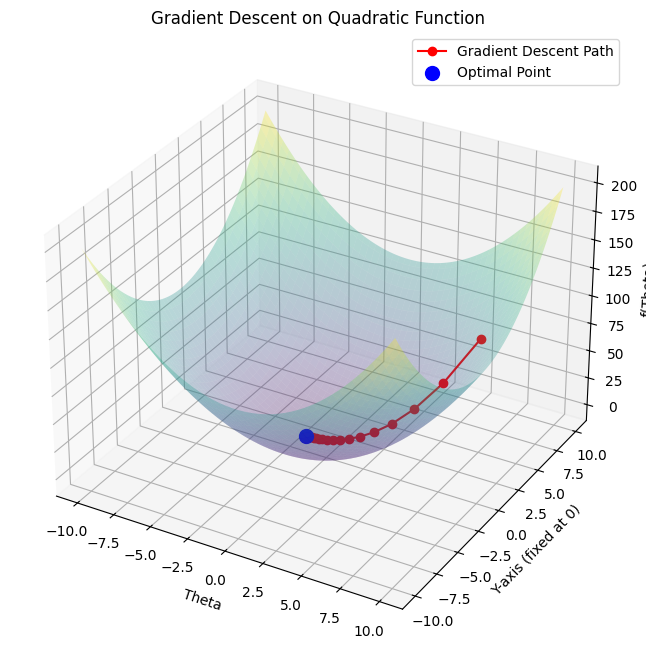

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go

def gradient_descent(f, grad_f, theta_init, learning_rate, iterations):
    theta = theta_init
    trajectory = [theta]
    for i in range(iterations):
        theta -= learning_rate * grad_f(theta)
        trajectory.append(theta)
    return theta, trajectory

f = lambda x: x**2 + 3*x + 2
grad_f = lambda x: 2*x + 3

theta_init = 10.0
learning_rate = 0.1
iterations = 20

optimal_theta, trajectory = gradient_descent(f, grad_f, theta_init, learning_rate, iterations)

x = np.linspace(-10, 10, 400)
y = f(x)

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

X = np.linspace(-10, 10, 100)
Y = np.linspace(-10, 10, 100)
X, Y = np.meshgrid(X, Y)
Z = X**2 + Y**2

ax.plot_surface(X, Y, Z, alpha=0.3, cmap='viridis')

trajectory_x = trajectory
trajectory_y = np.zeros_like(trajectory)
trajectory_z = [f(t) for t in trajectory]

ax.plot(trajectory_x, trajectory_y, trajectory_z, color='red', marker='o', label='Gradient Descent Path')
ax.scatter(optimal_theta, 0, f(optimal_theta), color='blue', s=100, label='Optimal Point')

ax.set_xlabel("Theta")
ax.set_ylabel("Y-axis (fixed at 0)")
ax.set_zlabel("f(Theta)")
ax.set_title("Gradient Descent on Quadratic Function")
ax.legend()

plt.show()


In [10]:
fig = go.Figure()

fig.add_trace(go.Surface(z=Z, x=X, y=Y, colorscale='Viridis', opacity=0.7, name="Quadratic Surface"))

fig.add_trace(go.Scatter3d(
    x=trajectory_x,
    y=trajectory_y,
    z=trajectory_z,
    mode='markers+lines',
    marker=dict(size=5, color='red'),
    line=dict(color='red', width=2),
    name="Gradient Descent Path"
))

fig.add_trace(go.Scatter3d(
    x=[optimal_theta],
    y=[0],
    z=[f(optimal_theta)],
    mode='markers',
    marker=dict(size=10, color='blue'),
    name="Optimal Point"
))

fig.update_layout(
    scene=dict(
        xaxis_title="Theta",
        yaxis_title="Y-axis (fixed at 0)",
        zaxis_title="f(Theta)",
    ),
    title="Interactive Gradient Descent Visualization on Quadratic Function",
    width=800,
    height=600,
)

fig.show()


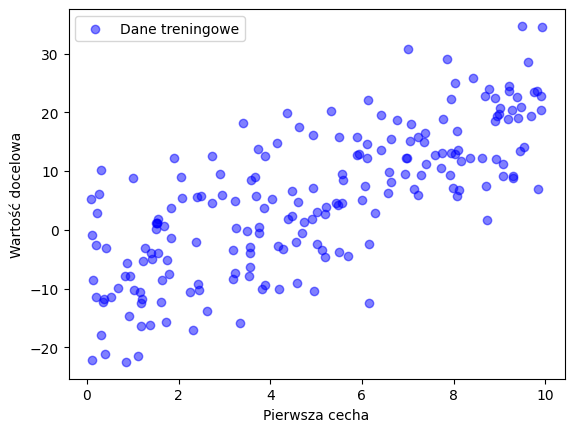

Epoch 1/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 154.0526 - mae: 10.5076
Epoch 2/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 125.3400 - mae: 9.4075 
Epoch 3/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 84.7576 - mae: 7.3288 
Epoch 4/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 34.3342 - mae: 4.6201 
Epoch 5/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 8.3026 - mae: 2.2783 
Epoch 6/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 7.9587 - mae: 2.3009  
Epoch 7/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 4.7978 - mae: 1.7050 
Epoch 8/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 5.0792 - mae: 1.8264 
Epoch 9/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 4.6716 - mae: 1.7317 
Epoch 10/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 3.4905 - mae: 1.5195 
Epoch 11/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 2.9102 - mae: 1.3177 
Epoch 12/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 3.9526 - mae: 1.5700 
Epoch 13/50
13/13 ━━━━━━━━━━━━

Loss na zbiorze testowym: 4.073068618774414
MAE na zbiorze testowym: 1.7190616130828857
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step
Prognozowane wartości dla nowych danych:
Przykład 1: -0.3757406771183014
Przykład 2: 12.173296928405762
Przykład 3: 31.54792594909668
Przykład 4: 15.699959754943848
Przykład 5: 12.362730979919434


In [7]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt

np.random.seed(42)
X_train = np.random.rand(200, 5) * 10
true_weights = np.array([3, -2, 1, 0.5, -1.5])
y_train = X_train @ true_weights + np.random.randn(200) * 2

plt.scatter(X_train[:, 0], y_train, c='blue', alpha=0.5, label='Dane treningowe')
plt.xlabel("Pierwsza cecha")
plt.ylabel("Wartość docelowa")
plt.legend()
plt.show()

model = Sequential([
    Dense(128, activation='relu', input_shape=(5,)),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1)
])

model.compile(optimizer='adam', loss='mse', metrics=['mae'])

model.fit(X_train, y_train, epochs=50, batch_size=16, verbose=1)

X_test = np.random.rand(50, 5) * 10
y_test = X_test @ true_weights + np.random.randn(50) * 2

loss, mae = model.evaluate(X_test, y_test, verbose=1)
print(f"Loss na zbiorze testowym: {loss}")
print(f"MAE na zbiorze testowym: {mae}")

new_data = np.random.rand(5, 5) * 10
predictions = model.predict(new_data)

print("Prognozowane wartości dla nowych danych:")
for i, prediction in enumerate(predictions):
    print(f"Przykład {i + 1}: {prediction[0]}")


Epoka 1/50, Błąd: 85.8206
Epoka 2/50, Błąd: 18.4098
Epoka 3/50, Błąd: 9.0317
Epoka 4/50, Błąd: 6.1497
Epoka 5/50, Błąd: 4.3704
Epoka 6/50, Błąd: 3.9973
Epoka 7/50, Błąd: 3.4688
Epoka 8/50, Błąd: 3.4723
Epoka 9/50, Błąd: 3.4233
Epoka 10/50, Błąd: 3.3331
Epoka 11/50, Błąd: 3.2797
Epoka 12/50, Błąd: 3.2992
Epoka 13/50, Błąd: 3.2741
Epoka 14/50, Błąd: 3.2954
Epoka 15/50, Błąd: 3.2749
Epoka 16/50, Błąd: 3.2797
Epoka 17/50, Błąd: 3.2226
Epoka 18/50, Błąd: 3.1431
Epoka 19/50, Błąd: 2.9835
Epoka 20/50, Błąd: 2.8061
Epoka 21/50, Błąd: 2.6800
Epoka 22/50, Błąd: 2.6315
Epoka 23/50, Błąd: 2.5057
Epoka 24/50, Błąd: 2.4765
Epoka 25/50, Błąd: 2.4837
Epoka 26/50, Błąd: 2.3832
Epoka 27/50, Błąd: 2.3284
Epoka 28/50, Błąd: 2.2928
Epoka 29/50, Błąd: 2.2789
Epoka 30/50, Błąd: 2.2599
Epoka 31/50, Błąd: 2.2231
Epoka 32/50, Błąd: 2.2320
Epoka 33/50, Błąd: 2.2625
Epoka 34/50, Błąd: 2.3087
Epoka 35/50, Błąd: 2.3017
Epoka 36/50, Błąd: 2.3491
Epoka 37/50, Błąd: 2.5362
Epoka 38/50, Błąd: 2.7943
Epoka 39/50, Błąd: 

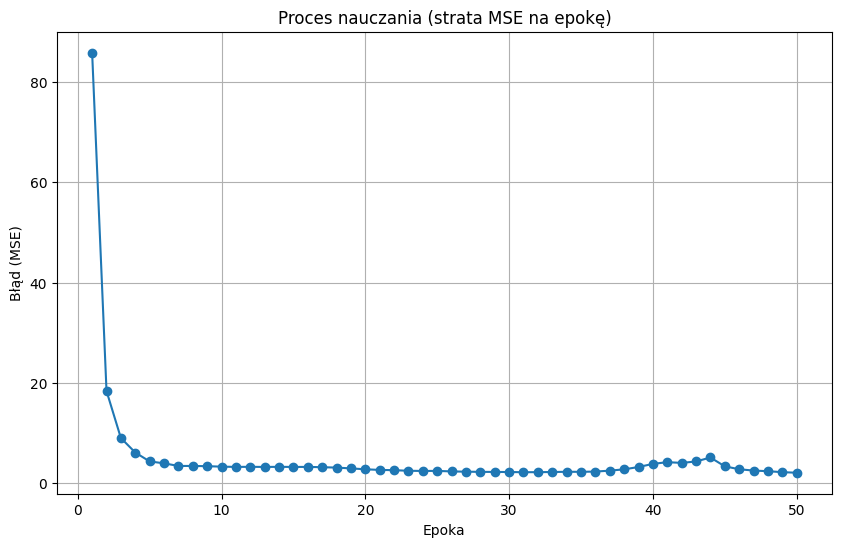

Błąd na zbiorze testowym (MSE): 337.8022
Prognozowane wartości dla nowych danych:
Przykład 1: 5.9423
Przykład 2: 5.4562
Przykład 3: 1.0982
Przykład 4: -2.0981
Przykład 5: 6.7858


/usr/local/lib/python3.11/dist-packages/torch/nn/modules/loss.py:608: UserWarning:

Using a target size (torch.Size([50, 1])) that is different to the input size (torch.Size([50, 1, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.



In [8]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt

class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(5, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 1)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        return self.fc3(x)

model = SimpleNN()

loss_fn = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

np.random.seed(42)
X_train = torch.tensor(np.random.rand(200, 5) * 10, dtype=torch.float32)
true_weights = torch.tensor([3, -2, 1, 0.5, -1.5], dtype=torch.float32)
y_train = X_train @ true_weights + torch.randn(200) * 2

X_test = torch.tensor(np.random.rand(50, 5) * 10, dtype=torch.float32)
y_test = X_test @ true_weights + torch.randn(50) * 2


epochs = 50
batch_size = 16
num_batches = len(X_train) // batch_size
loss_history = []


for epoch in range(epochs):
    model.train()
    epoch_loss = 0
    for i in range(0, len(X_train), batch_size):
        X_batch = X_train[i:i+batch_size]
        y_batch = y_train[i:i+batch_size].unsqueeze(1)

        y_pred = model(X_batch)
        loss = loss_fn(y_pred, y_batch)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        epoch_loss += loss.item()

    epoch_loss /= num_batches
    loss_history.append(epoch_loss)
    print(f"Epoka {epoch+1}/{epochs}, Błąd: {epoch_loss:.4f}")

plt.figure(figsize=(10, 6))
plt.plot(range(1, epochs + 1), loss_history, marker='o')
plt.xlabel('Epoka')
plt.ylabel('Błąd (MSE)')
plt.title('Proces nauczania (strata MSE na epokę)')
plt.grid()
plt.show()

model.eval()
with torch.no_grad():
    y_test_pred = model(X_test.unsqueeze(1))
    test_loss = loss_fn(y_test_pred, y_test.unsqueeze(1)).item()
    print(f"Błąd na zbiorze testowym (MSE): {test_loss:.4f}")

new_data = torch.tensor(np.random.rand(5, 5) * 10, dtype=torch.float32)
with torch.no_grad():
    predictions = model(new_data)

print("Prognozowane wartości dla nowych danych:")
for i, prediction in enumerate(predictions):
    print(f"Przykład {i + 1}: {prediction.item():.4f}")


Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 9.91M/9.91M [00:00<00:00, 43.7MB/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 28.9k/28.9k [00:00<00:00, 1.78MB/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 1.65M/1.65M [00:00<00:00, 13.9MB/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 4.54k/4.54k [00:00<00:00, 2.65MB/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



Epoch 1/10, Loss: 0.1607, Accuracy: 95.14%
Epoch 2/10, Loss: 0.0460, Accuracy: 98.61%
Epoch 3/10, Loss: 0.0321, Accuracy: 99.02%
Epoch 4/10, Loss: 0.0232, Accuracy: 99.25%
Epoch 5/10, Loss: 0.0188, Accuracy: 99.37%
Epoch 6/10, Loss: 0.0140, Accuracy: 99.54%
Epoch 7/10, Loss: 0.0110, Accuracy: 99.64%
Epoch 8/10, Loss: 0.0097, Accuracy: 99.67%
Epoch 9/10, Loss: 0.0087, Accuracy: 99.73%
Epoch 10/10, Loss: 0.0071, Accuracy: 99.77%
Test Accuracy: 99.03%


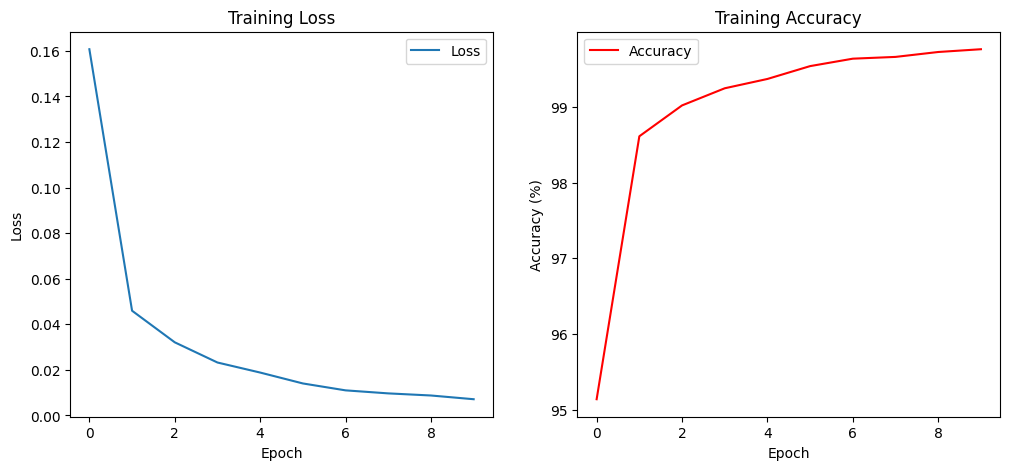

In [9]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np

batch_size = 64
epochs = 10
learning_rate = 0.001

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])


trainset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size, shuffle=True)

testset = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size, shuffle=False)

class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.pool = nn.MaxPool2d(2, 2)
        self.fc1 = nn.Linear(64 * 7 * 7, 128)
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 64 * 7 * 7)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

model = CNN().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

train_losses = []
train_accuracies = []

def train():
    for epoch in range(epochs):
        running_loss = 0.0
        correct = 0
        total = 0
        for images, labels in trainloader:
            images, labels = images.to(device), labels.to(device)
            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

        train_losses.append(running_loss / len(trainloader))
        train_accuracies.append(100 * correct / total)
        print(f'Epoch {epoch+1}/{epochs}, Loss: {running_loss/len(trainloader):.4f}, Accuracy: {100*correct/total:.2f}%')

def test():
    correct = 0
    total = 0
    with torch.no_grad():
        for images, labels in testloader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    print(f'Test Accuracy: {100 * correct / total:.2f}%')


def plot_training():
    plt.figure(figsize=(12,5))
    plt.subplot(1,2,1)
    plt.plot(train_losses, label='Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Training Loss')
    plt.legend()

    plt.subplot(1,2,2)
    plt.plot(train_accuracies, label='Accuracy', color='red')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy (%)')
    plt.title('Training Accuracy')
    plt.legend()
    plt.show()

train()
test()
plot_training()
